In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv("/Users/mineozfen/Desktop/metadata.csv",low_memory=False )
df.head() ##İlk beş satırı döndürür
print(df.columns)

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')


In [3]:
# İlk 5 satırı göster
print(df.head())

# Genel bilgi
print(df.info())

# Eksik değer sayısı
print(df.isnull().sum().sort_values(ascending=False))

# Veri setinin kaç satır kaç sütun olduğu
print(f"Satır sayısı: {df.shape[0]}, Sütun sayısı: {df.shape[1]}")


   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc

In [4]:
# En çok görülen kaynaklar
print(df['source_x'].value_counts().head(10))

# En çok yayınlanan dergiler
print(df['journal'].value_counts().head(10))


source_x
WHO                            450459
Medline; PMC                   150593
Medline                        131531
PMC                             80192
Medline; PMC; WHO               65968
Elsevier; Medline; PMC          49318
Medline; WHO                    43928
Elsevier; Medline; PMC; WHO     19794
MedRxiv; WHO                    13756
ArXiv                           13176
Name: count, dtype: int64
journal
PLoS One                           9953
bioRxiv                            8961
Int J Environ Res Public Health    8201
BMJ                                6928
Sci Rep                            5935
Cureus                             4212
Reactions Weekly                   3891
Front Psychol                      3541
BMJ Open                           3515
Front Immunol                      3442
Name: count, dtype: int64


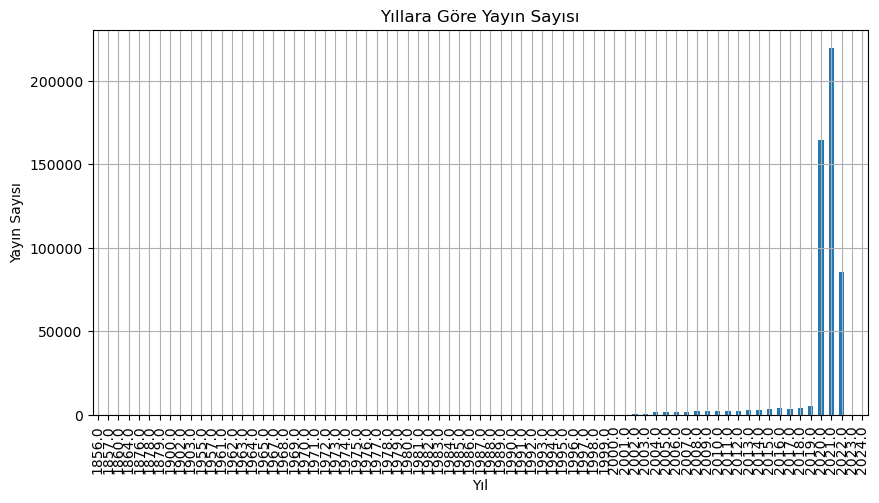

In [5]:
# publish_time sütununu datetime'a çevir
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Yıla göre yayın sayısı
df['publish_year'] = df['publish_time'].dt.year
df['publish_year'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Yıllara Göre Yayın Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Yayın Sayısı")
plt.grid(True)
plt.show()


In [6]:
# En çok adı geçen yazar(lar)
df['authors'].dropna().str.split(';').explode().str.strip().value_counts().head(10)


authors
Anonymous,           3904
O039,                2532
D039,                1689
Wang, Wei             825
Ieee,                 741
Wiwanitkit, Viroj     716
Zhang, Wei            635
Mahase, Elisabeth     629
Li, Yan               607
Wang, Jing            596
Name: count, dtype: int64

In [7]:
summary = pd.DataFrame({
    'Toplam Kayıt': [df.shape[0]],
    'Boş Başlık Sayısı': [df['title'].isnull().sum()],
    'Boş Özet Sayısı': [df['abstract'].isnull().sum()],
    'En Çok Kaynak': [df['source_x'].value_counts().idxmax()],
    'En Çok Dergi': [df['journal'].value_counts().idxmax()]
})
print(summary)


   Toplam Kayıt  Boş Başlık Sayısı  Boş Özet Sayısı En Çok Kaynak En Çok Dergi
0       1056660                503           235544           WHO     PLoS One


In [8]:
# Kaç farklı yayın DOI'si var?
print("Farklı DOI sayısı:", df['doi'].nunique())


Farklı DOI sayısı: 655525
